Praktek TF-IDF
=============================

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';')

In [3]:
dataset.shape

(902, 10)

In [4]:
dataset.head(3)

,Unnamed: 0,Unnamed: 0.1,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...


In [5]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [6]:
dataset_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh orang pintar lu aja togog kerumun orang...
                             ...                        
897    seluruh negara dunia alami masa sulit covid ra...
898    covid skripsi disaster selesai mau bgt bljr ma...
899    malam projek benda bincang malam fb satu belia...
900                          pontang panting koyak covid
901    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 902, dtype: object

In [7]:
dataset_label = dataset['Sentimen']

In [8]:
dataset_label

0      1.0
1      1.0
2      1.0
3      0.0
4     -1.0
      ... 
897    1.0
898    1.0
899    0.0
900   -1.0
901   -1.0
Name: Sentimen, Length: 902, dtype: float64

# cek distribusi label

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/masaboe/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


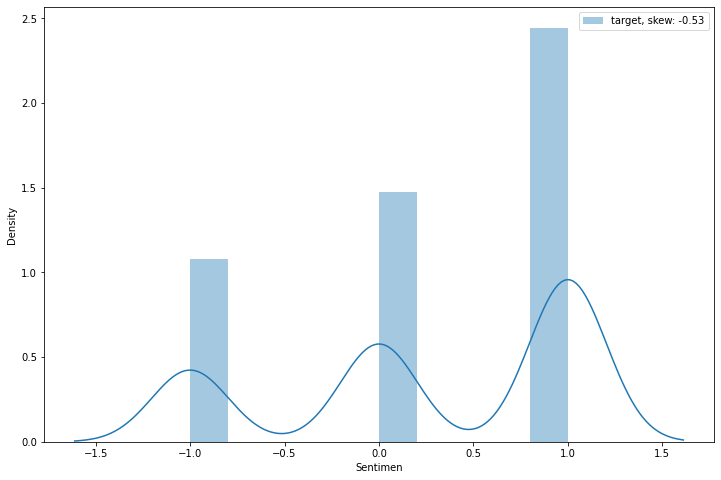

In [10]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [11]:
dataset_label.value_counts()

 1.0    441
 0.0    266
-1.0    195
Name: Sentimen, dtype: int64

# TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer()

In [14]:
positive_reviews = dataset[(dataset["Sentimen"] == 1)]
negative_reviews = dataset[(dataset["Sentimen"] == -1)]
neutral_reviews = dataset[(dataset["Sentimen"] == 0)]

In [15]:
positive_reviews.head()

,Unnamed: 0,Unnamed: 0.1,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
6,6,6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,selamat pagi hari jumat jumat keempat di kala ...,"['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...","['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...",selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat empat kala pande...
7,7,7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,hikmah di balik musibah covid smg para pejab...,"['hikmah', 'di', 'balik', 'musibah', 'covid', ...","['hikmah', 'di', 'balik', 'musibah', 'covid', ...",hikmah di balik musibah covid smg para pejabat...,hikmah di balik musibah covid smg para pejabat...,hikmah balik musibah covid smg jabat perintah ...


In [16]:
Positive_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_tf_idf = Positive_tf_idf_vect.fit_transform(positive_reviews["ProcessedText"].values)

In [17]:
Positive_tf_idf.shape

(441, 7781)

In [18]:
features = Positive_tf_idf_vect.get_feature_names()

/Users/masaboe/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
idfValues = Positive_tf_idf_vect.idf_

In [20]:
d = dict(zip(features, 9 - idfValues))

In [21]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [22]:
for i in range(200):
    print(sortedDict[i])

('covid', 7.97247532660991)
('virus', 6.083077387817939)
('cegah', 6.067573201281974)
('sebar', 6.0195639820956135)
('corona', 5.934041808657451)
('moga', 5.878982031474424)
('sama', 5.878982031474424)
('rumah', 5.737331514411396)
('yg', 5.737331514411396)
('wabah', 5.669890233615864)
('semua', 5.597569572036238)
('masyarakat', 5.464038179411716)
('perintah', 5.464038179411716)
('sehat', 5.464038179411716)
('tangan', 5.464038179411716)
('jaga', 5.405197679388782)
('bantu', 5.342677322407448)
('virus corona', 5.342677322407448)
('indonesia', 5.309887499584457)
('laku', 5.309887499584457)
('satu', 5.309887499584457)
('segera', 5.309887499584457)
('wabah covid', 5.309887499584457)
('beri', 5.275985947908776)
('corona covid', 5.275985947908776)
('pandemi', 5.275985947908776)
('sebar covid', 5.275985947908776)
('lawan', 5.2408946280975055)
('jadi', 5.20452698392663)
('hari', 5.166786655943784)
('tetap', 5.166786655943784)
('virus covid', 5.166786655943784)
('ada', 5.127565942790502)
('pande

In [ ]:
# !pip3 install wordcloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [24]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

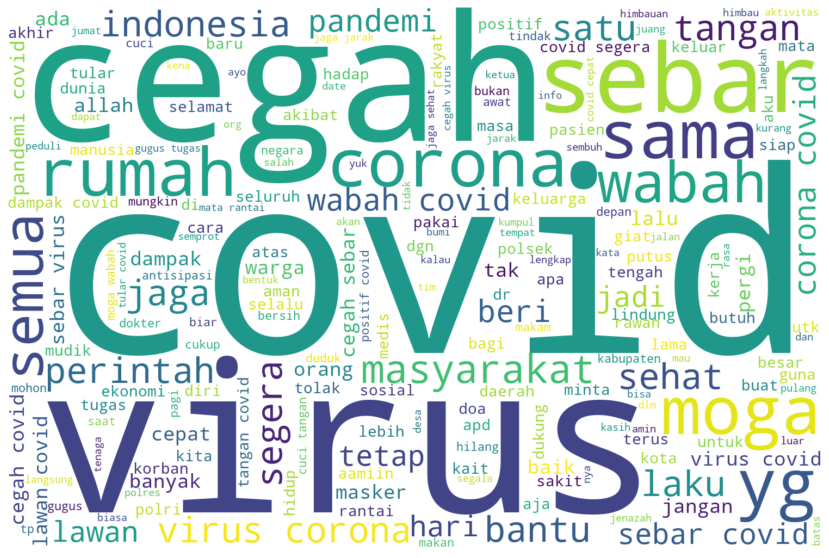

In [25]:
PlotWordCloud(d)

# silakan lakukan untuk netral dan negative